In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
dfMain = pd.read_csv("../data/raw/raw_MC.csv")
display(dfMain)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Task 1: Conduct an EDA

In [ ]:
dfMain.shape

# May dataset has 1338 columns and 7 rows 

(1338, 7)

In [ ]:
dfMain.head()

# The output below shows the first 5 rows of my dataset. I can see some example values of each variable listed in the columns. 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dfMain.columns

# The columns in my dataset are: 'age', 'sex', 'bmi', 'children', 'smoker', 'region', and 'charges'. 
# These are the variable that were collected and can be studied. 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
dfMain.nunique(axis=0)

# These are the unique values of each variable. 
# The oldest age is 47 years old.
# There are two types of sex; male and female 
# There are six different categories of children ranging from 0 to 6 children 
# There are two types of answers for smokers; yes and no
# There are 4 different regions; northeast, northwest, southeast, southwest
# There are 1337 different types of charges (this does not tell us much because it just means that none of the charges match).

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

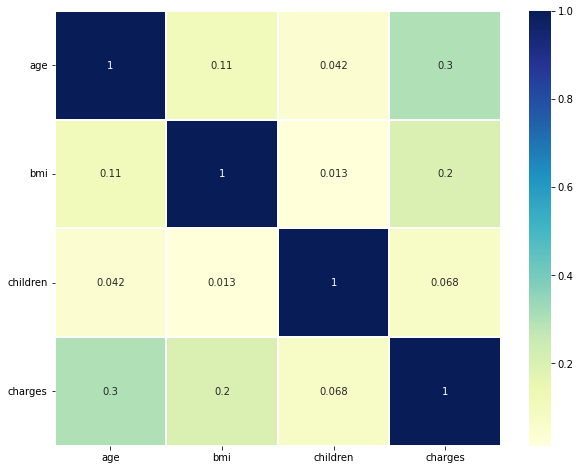

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dfMain.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# I am graphing a correlation matrix to gain general understanding of all of my numeric variables. 
# All of the variables have a correlation in the positive direction. 

<seaborn.axisgrid.PairGrid>

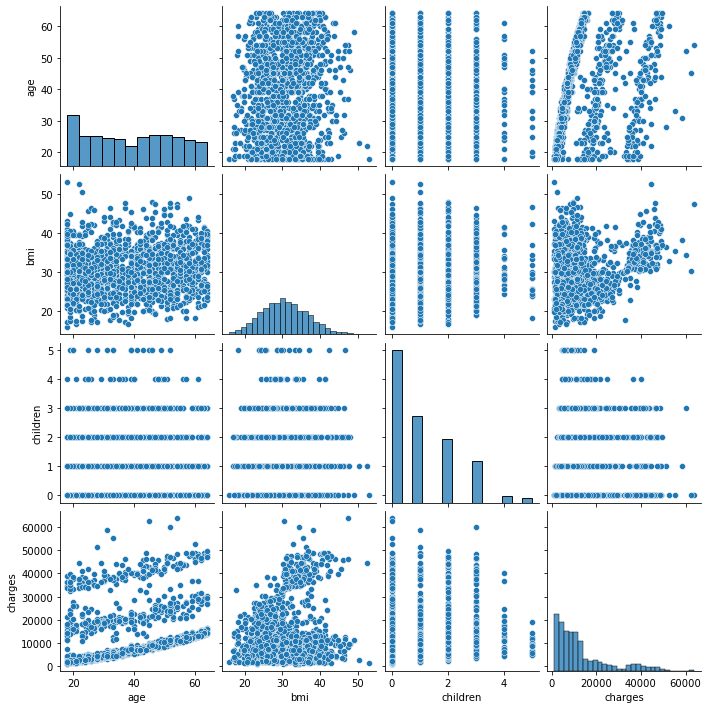

In [ ]:
# create a plot for every column in df

sns.pairplot(dfMain)

<AxesSubplot:ylabel='Frequency'>

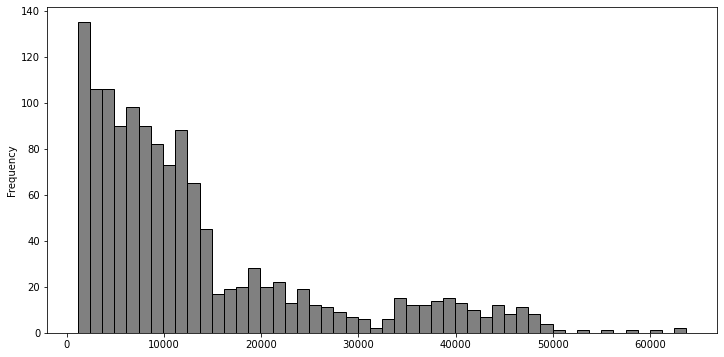

In [ ]:
dfMain['charges'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

# This is a positively skewed data. It shows that a larger number of people are charged on the lower end of the price range shown in our dataset

# Task 2: Setting up an "Analysis Pipeline"

In [ ]:
# I am only interested in the variables 'smoker', 'age', and 'charges' so I will be removing the other columns. 

dfNew = dfMain.drop(columns=['sex', 'bmi', 'children', 'region'])
dfNew.rename(columns = {'age':'Age', 'smoker':'Smoker','charges':'Total Charges'}, inplace = True)
dfNew

,Age,Smoker,Total Charges
0,19,yes,16884.92400
1,18,no,1725.55230
2,28,no,4449.46200
3,33,no,21984.47061
4,32,no,3866.85520
...,...,...,...
1333,50,no,10600.54830
1334,18,no,2205.98080
1335,18,no,1629.83350
1336,21,no,2007.94500


In [ ]:
dfNew.info()

# This function shows that there is no null values in our dataset 
# The type of data for each variable is also stated below. 
#  - age and children are integers. 
#  - sex, smoker, and region are objects.
#  - bmi and charges are floating point numbers. 
# I will be changing 'children', 'sex', 'smoker', and 'region' variables to categories because they are categorical data. 
# 'age', 'bmi', and 'charges' are all numerical and continuous data, but I will keep age as an integer and the rest as floating point numbers. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1337 non-null   int64  
 1   Smoker         1337 non-null   object 
 2   Total Charges  1337 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 41.8+ KB


In [ ]:
# set categorical data

dfNew['Smoker'] = dfNew['Smoker'].astype('category')
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            1337 non-null   int64   
 1   Smoker         1337 non-null   category
 2   Total Charges  1337 non-null   float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 32.8 KB


In [ ]:
# generate preview of entries with null values

if dfNew.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(dfNew[dfNew.isnull().any(axis=1)])
    missingno.matrix(dfNew)
    plt.show()
else: 
    print("No null values in this dataset")
    
# There are no null values in this dataset

No null values in this dataset


In [ ]:
# generate count statistics of duplicate entries

if len(dfNew[dfNew.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(dfNew[dfNew.duplicated()]))
    print(dfNew[dfNew.duplicated(keep=False)].sort_values(by=list(dfNew.columns)))
else:
    print("No duplicated entries found")

# There is oen set of duplicate entries in row 195 and row 581. 
#      age   sex    bmi children smoker     region    charges
# 195   19  male  30.59        0     no  northwest  1639.5631
# 581   19  male  30.59        0     no  northwest  1639.5631

No duplicated entries found


In [ ]:
dfMain.drop_duplicates(inplace=True)

if len(dfMain[dfMain.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(dfMain[dfMain.duplicated()]))
    print(dfMain[dfMain.duplicated(keep=False)].sort_values(by=list(dfMain.columns)))
else:
    print("No duplicated entries found")

# Now there are no more duplicate entries. 

No duplicated entries found


In [ ]:
# Next, I will round all of my float point values to 2 decimal places for simplicity. 

dfNew['Total Charges'] = dfNew['Total Charges'].round(decimals = 2)
dfNew.head()

,Age,Smoker,Total Charges
0,19,yes,16884.92
1,18,no,1725.55
2,28,no,4449.46
3,33,no,21984.47
4,32,no,3866.86


<AxesSubplot:xlabel='Total Charges'>

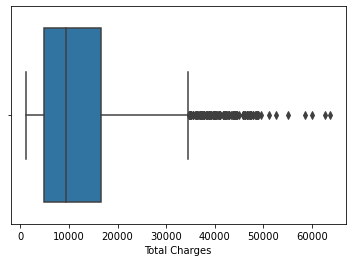

In [ ]:
sns.boxplot(x=dfNew['Total Charges'])

# This is a boxplot for the total charges. As you can see, there are many outliers which can be removed. 

In [ ]:
for x in ['Total Charges']:
    q75,q25 = np.percentile(dfNew.loc[:,x],[75,25])
    iqr = q75-q25

    max = q75+(1.5*iqr)
    min = q25-(1.5*iqr)
 
    dfNew.loc[dfNew[x] < min,x] = np.nan
    dfNew.loc[dfNew[x] > max,x] = np.nan
    


# This code identified the outliers and converted them to null values

dfNew.isnull().sum()

# This code shows the amount of null values. 

Age                0
Smoker             0
Total Charges    139
dtype: int64

In [ ]:
dfNew = dfNew.dropna(axis = 0)

# This code drops the null values 

dfNew.isnull().sum()

Age              0
Smoker           0
Total Charges    0
dtype: int64

In [ ]:
dfNew.describe()

,Age,Total Charges
count,1198.000000,1198.000000
mean,39.006678,9934.671753
std,14.062040,7240.216954
min,18.000000,1121.870000
25%,26.000000,4418.592500
50%,39.000000,8411.755000
75%,51.000000,12955.357500
max,64.000000,34472.840000


# Task 3: Method Chaining and Writing Python Programs

In [ ]:
import project_functions3 as p3

In [ ]:
dfNew = project_functions3.load_and_process("../data/raw/raw_MC.csv")
dfNew

NameError: name 'project_functions3' is not defined

NameError: name 'dfNew' is not defined

# Task 4

<AxesSubplot:xlabel='Age', ylabel='Total Charges'>

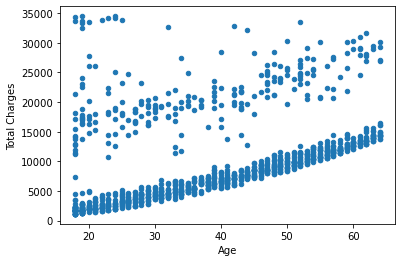

In [ ]:
# I am interested in visualizing the relationship between age and charges. I can do a scatterplot to try to see the trend.
dfNew.plot(kind = 'scatter', x = 'Age', y = 'Total Charges')
# There is a positive linear relationship between one's age and their total medical insurance costs.

<AxesSubplot:xlabel='Smoker', ylabel='Total Charges'>

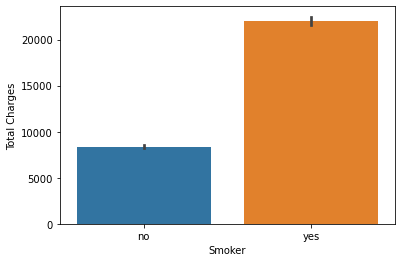

In [ ]:
sns.barplot(data=dfNew, x="Smoker", y="Total Charges", errorbar=("se"))

# The total medical insurance costs for smokers is significantly higher than non-smokers

In [ ]:
import project_functions3 as p3

In [ ]:
def load_and_process(url_or_path_to_csv_file):
    dfMain = (
        pd.read_csv(url_or_path_to_csv_file)
    )
    return dfMain

dfMain = load_and_process("../data/raw/raw_MC.csv")
display(dfMain)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
def cleaned_df(data) :   
    dfNew = (   
        data
        .drop(columns=['sex', 'bmi', 'children', 'region'])
        .rename(columns = {'age':'Age', 'smoker':'Smoker','charges':'Total Charges'}, inplace = True)
    )
    return dfNew

dfNew = cleaned_df(dfMain)
display(dfNew)

None